In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline
matplotlib.rcParams['font.family'] = ['DengXian', 'sans-serif']

In [12]:
fn = 'phone_data2.csv'
df = pd.read_csv(fn).iloc[0:15]
c = df['CPU'].astype('category')

In [13]:
df.head()

,brand,厂牌,SKU,name,0604价格,CPU,长,宽,厚,重,屏,分辨率长,分辨率宽,屏幕类型,ppi,上市时间
0,apple,苹果,1.000083e+11,11,5499.0,A13,150.90,75.70,8.30,194.0,6.10,1792.0,828.0,Liquid LCD,326.0,19年9月1日
1,apple,苹果,1.000083e+11,11 pro,8799.0,A13,144.00,71.40,8.10,188.0,5.80,2436.0,1125.0,XDR OLED,458.0,NaN
2,apple,苹果,1.000083e+11,11 Pro max,9299.0,A13,158.00,77.80,8.10,226.0,6.50,2688.0,1242.0,XDR OLED,458.0,NaN
3,apple,苹果,1.000069e+11,SE2,3799.0,A13,138.40,67.30,7.30,148.0,4.70,1334.0,750.0,LCD,326.0,NaN
4,mi,小米,1.000128e+11,10 青春版,2299.0,骁龙765G,164.02,74.77,7.88,192.0,6.57,2400.0,1080.0,AMOLED,NaN,NaN


In [26]:
x1 = df['宽']

In [14]:
y1 = df['长']

In [20]:
ppi = np.sqrt(df['分辨率宽']**2 + df['分辨率长']**2) / (df['屏'] * 25.4)

In [22]:
x2 = df['分辨率宽'] / ppi

In [23]:
y2 = df['分辨率长'] / ppi

In [70]:
p1 = list(zip([0]*15, x2, x1))

In [71]:
p2 = list(zip([0]*15, y2, y1))

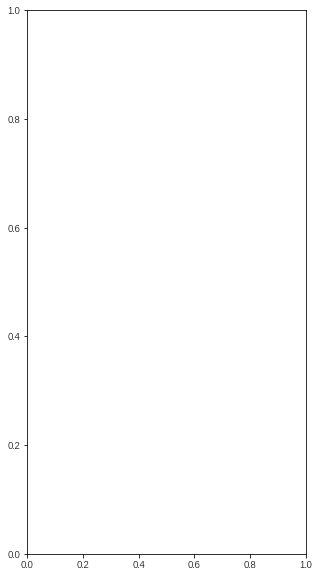

In [83]:
fig, ax = plt.subplots(figsize=(5,10))

In [84]:
for i in range(15):
    ax.plot(p1[i], p2[i], lw=0.35, marker='o', alpha=0.75)

In [99]:
ax.set_xlim(60, 80)
ax.set_ylim(130, 170)
# box 更换成另一个选择
ax.set_aspect('equal', 'box')

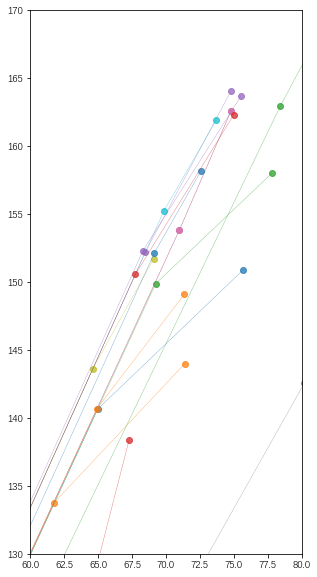

In [100]:
fig

In [91]:
y2.min()

104.06118486860336

In [92]:
y1.max()

177.57